In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm      
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from labellines import labelLine, labelLines
from matplotlib.lines import Line2D
import pandas as pd
zps = {'F115W':1587, 'F150W':1074, 'F210M':653,'F277W':427, 'F380M':253, 'F430M':194, 'F480M':150, '1020': 34.9,'1500':18,'2100':8}

In [2]:
instru = 'nrsami'
datasets = []
for casedir in ['5', '1', '2','0']:
    for inc in ['0','30','60']:
        tablename = f'data{casedir}_inc{inc}'
        data = pd.read_csv(f"flux_tables/table_{instru}{casedir}_inc{inc}_pipl.csv")
        data = data.rename(columns={"CPD-bg":"flux1","antiCPD-bg":"flux1anti","mag CPD-antiCPD": "mag2", "mag CPD-bg": "mag1"})
        for col in ['mag1','mag2','SNR_CPD']:
            data[col] = pd.to_numeric(data[col],errors='coerce')
        # add a mag1anti column
        mag1anti =  [2.5 * np.log10(zps[data['filter'][i]]/data['flux1anti'][i]) for i in range(len(data))]
        data['mag1anti'] = mag1anti
        exec(f'{tablename} = data')
        exec(f'datasets.append({tablename})')
        
data0_inc0

,model,filter,CPD tot,Background,flux1,flux1anti,CPD-antiCPD,mag1,mag2,SNR_CPD,flag,mag1anti
0,10jup50au,F277W,0.00951,9.130000e-11,0.00951,0.0159,-0.006380,11.63,NaN,0.60,nondetect,11.072577
1,10jup50au,F380M,0.02110,0.000000e+00,0.02110,0.0193,0.001790,10.20,12.87,1.09,nondetect,10.293908
2,10jup50au,F430M,0.01240,0.000000e+00,0.01240,0.0170,-0.004610,10.49,NaN,0.73,nondetect,10.143382
3,10jup50au,F480M,0.01120,0.000000e+00,0.01120,0.0120,-0.000831,10.32,NaN,0.93,nondetect,10.242275
4,5jup50au,F277W,0.00950,9.190000e-11,0.00950,0.0159,-0.006380,11.63,NaN,0.60,nondetect,11.072577
5,5jup50au,F380M,0.02110,0.000000e+00,0.02110,0.0193,0.001790,10.20,12.88,1.09,nondetect,10.293908
6,5jup50au,F430M,0.01240,0.000000e+00,0.01240,0.0170,-0.004570,10.49,NaN,0.73,nondetect,10.143382
7,5jup50au,F480M,0.01120,0.000000e+00,0.01120,0.0121,-0.000855,10.32,NaN,0.93,nondetect,10.233265
8,1jup50au,F277W,0.00952,9.080000e-11,0.00952,0.0159,-0.006420,11.63,NaN,0.60,nondetect,11.072577
9,1jup50au,F380M,0.02110,0.000000e+00,0.02110,0.0193,0.001800,10.20,12.87,1.09,nondetect,10.293908


In [7]:
data5_inc0

,model,filter,CPD tot,Background,flux1,flux1anti,CPD-antiCPD,mag1,mag2,SNR_CPD,flag,mag1anti
0,10jup50au,F277W,0.01820,1.210000e-10,0.01820,0.0159,0.002240,10.93,13.20,1.14,asymm,11.072577
1,10jup50au,F380M,0.07820,0.000000e+00,0.07820,0.0197,0.058500,8.77,9.09,3.97,detect,10.271636
2,10jup50au,F430M,0.06890,0.000000e+00,0.06890,0.0183,0.050600,8.62,8.96,3.76,detect,10.063377
3,10jup50au,F480M,0.09140,0.000000e+00,0.09140,0.0185,0.072900,8.04,8.28,4.95,detect,9.772299
4,5jup50au,F277W,0.00952,9.140000e-11,0.00952,0.0159,-0.006400,11.63,NaN,0.60,nondetect,11.072577
5,5jup50au,F380M,0.02150,0.000000e+00,0.02150,0.0193,0.002220,10.18,12.64,1.12,asymm,10.293908
6,5jup50au,F430M,0.01310,0.000000e+00,0.01310,0.0170,-0.003890,10.42,NaN,0.77,nondetect,10.143382
7,5jup50au,F480M,0.01300,0.000000e+00,0.01300,0.0122,0.000787,10.16,13.20,1.06,nondetect,10.224329
8,1jup50au,F277W,0.00953,8.990000e-11,0.00953,0.0159,-0.006380,11.63,NaN,0.60,nondetect,11.072577
9,1jup50au,F380M,0.02120,0.000000e+00,0.02120,0.0193,0.001820,10.19,12.86,1.09,nondetect,10.293908


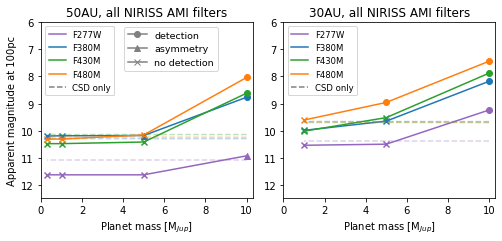

In [6]:
# mass vs mag, diff filters
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(7,3.3))

for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(4):
        if sub==0:
            x, y, y0, flags = [10,5,1,0.3], data5_inc0.mag1[i:16+i:4].values, data0_inc0.mag1anti[i:16+i:4], data5_inc0.flag[i:16+i:4].values
        elif sub==1:
            x, y, y0, flags = [10,5,1], data5_inc0.mag1[16+i::4].values, data0_inc0.mag1anti[16+i::4], data5_inc0.flag[16+i::4].values
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        xasy, yasy = [x[j] for j in range(len(x)) if flags[j] == 'asymm'], [y[j] for j in range(len(x)) if flags[j] == 'asymm']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.scatter(xasy, yasy, c=colors[i], marker='^')
        plt.plot(x, y,label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Planet mass [M$_{Jup}$]')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    sep = '50AU' if sub==0 else '30AU'
    plt.title(f'{sep}, all NIRISS AMI filters')
    plt.xlim((0,10.3))
    plt.ylim((12.5, 6))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles,loc=2, prop={'size': 8.5})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='^', color=markercolor, label='asymmetry', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=2, bbox_to_anchor=(0.37,1), prop={'size': 9.5})
        plt.gca().add_artist(legend1)

plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/nrsami_mass_mag_filterlines.png', bbox_inches='tight', dpi=200)

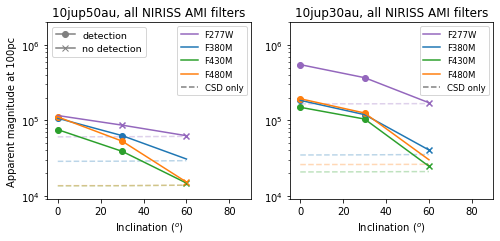

In [43]:
# inc vs mag, diff filters, 10jup
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
titles= ['10jup50au','10jup30au','5jup30au']
plt.figure(figsize=(7,3.3))
for sub in range(2):
    plt.subplot(1,2,sub+1)
    for i in range(4):
        if sub==0:
            x, y = [0,30,60], [data5_inc0.mag1[i],data5_inc30.mag1[i],data5_inc60.mag1[i]]
            y0 = [data0_inc0.mag1[i],data0_inc30.mag1[i],data0_inc60.mag1[i]]
            flags =  [data5_inc0.flag[i],data5_inc30.flag[i],data5_inc60.flag[i]]
        elif sub==1:
            x, y = [0,30,60], [data5_inc0.mag1[i+16],data5_inc30.mag1[i+16],data5_inc60.mag1[i+16]]
            y0 = [data0_inc0.mag1[i+16],data0_inc30.mag1[i+16],data0_inc60.mag1[i+16]]
            flags =  [data5_inc0.flag[i+16],data5_inc30.flag[i+16],data5_inc60.flag[i+16]]
        # elif sub==2:
        #     x, y = [0,30,60], [data5_inc0.mag1[i+25],data5_inc30.mag1[i+25],data5_inc60.mag1[i+25]]
        #     y0 = [data0_inc0.mag1[i+25],data0_inc30.mag1[i+25],data0_inc60.mag1[i+25]]
        #     flags =  [data5_inc0.flag[i+25],data5_inc30.flag[i+25],data5_inc60.flag[i+25]]                        
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y, label=data5_inc0['filter'][i], color=colors[i])
        plt.plot(x, y0, alpha=0.3, color=colors[i], linestyle='--')
    plt.xlabel('Inclination ($^{o}$)')
    if sub==0:
        plt.ylabel('Apparent magnitude at 100pc')
    plt.title(f'{titles[sub]}, all NIRISS AMI filters')
    plt.xlim((-5,90))
    plt.yscale('log')
    plt.ylim((9e3, 2e6))
    handles, labels = plt.gca().get_legend_handles_labels()
    line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
    handles.append(line)
    legend1 = plt.legend(handles=handles, loc=1,prop={'size': 8.5})
    markercolor, markersize = 'gray', 6
    legend_elements = [Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                       Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
    if sub==0:
        legend2 = plt.legend(handles=legend_elements, loc=2, bbox_to_anchor=(0,1),prop={'size': 9.5})
        plt.gca().add_artist(legend1)
plt.tight_layout(pad=0.5)
plt.savefig('../simtools/analysis_plots/nrsami_inc_mag_filterlines.png', bbox_inches='tight', dpi=200)

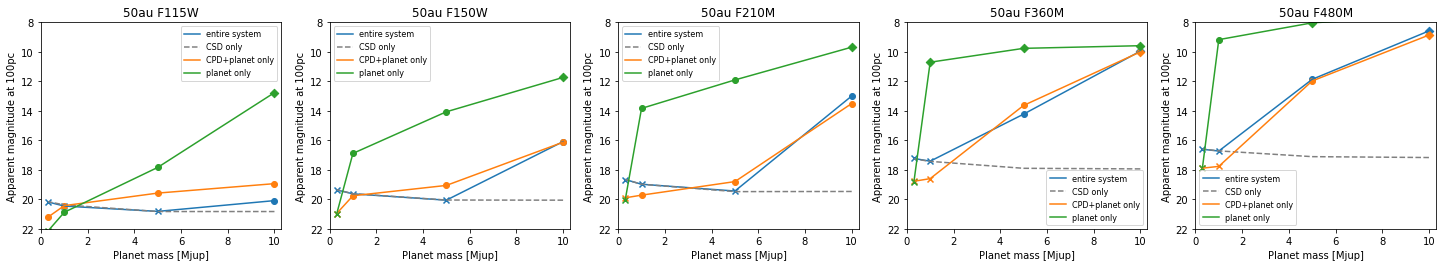

In [130]:
# mass vs magnitude diff cases 50au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(25,3.8))

for sub in range(4):
    plt.subplot(1,4,sub+1)
    x = [10,5,1,0.3]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[sub:15+sub:4].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[sub:16+sub:4].values')
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('50au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.yscale('log')
    plt.ylim((10,10000))

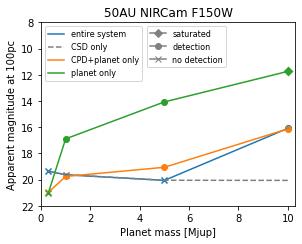

In [191]:
# mass vs magnitude diff cases single
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(4.3,3.5))
x = [10,5,1,0.3]
for i in range(4):
    y = eval(f'data{cases[i]}_inc0.mag1[1:20+1:5].values')
    if i==1:
        plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
    else:
        flags =  eval(f'data{cases[i]}_inc0.flag[1:20+1:5].values')
        xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
        xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
        xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
        plt.scatter(xsat, ysat, c=colors[i], marker='D')
        plt.scatter(xdet, ydet, c=colors[i], marker='o')
        plt.scatter(xnon, ynon, c=colors[i], marker='x')
        plt.plot(x, y, color=colors[i], label=labels[i])
legend1 = plt.legend(prop={'size': 8})
plt.xlabel('Planet mass [Mjup]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('50AU NIRCam '+data['filter'][1])
plt.xlim((0,10.3))
plt.ylim((22,8))

markercolor, markersize = 'gray', 6
legend_elements = [Line2D([0], [0], marker='D', color=markercolor, label='saturated', markerfacecolor=markercolor, markersize=markersize),
                    Line2D([0], [0], marker='o', color=markercolor, label='detection', markerfacecolor=markercolor, markersize=markersize),
                    Line2D([0], [0], marker='x', color=markercolor, label='no detection', markerfacecolor=markercolor, markersize=markersize)]
legend2 = plt.legend(handles=legend_elements, loc=3, bbox_to_anchor=(0.4, 0.735),prop={'size': 8})
plt.gca().add_artist(legend1)
plt.tight_layout()
plt.savefig('../simtools/analysis_plots/mass_mag_cases.png', bbox_inches='tight', dpi=200)

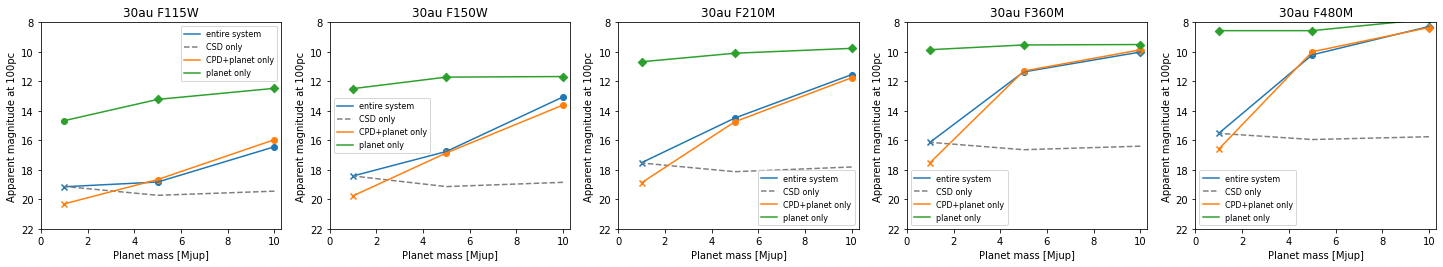

In [131]:
# mass vs magnitude diff cases 30au
colors= ['tab:blue','tab:red','tab:orange','tab:green']
labels= ['entire system', 'CSD only' ,'CPD+planet only', 'planet only']
cases= ['5','0','1','2']
plt.figure(figsize=(25,3.8))

for sub in range(5):
    plt.subplot(1,5,sub+1)
    x = [10,5,1]
    for i in range(4):
        y = eval(f'data{cases[i]}_inc0.mag1[20+sub::5].values')
        if i==1:
            plt.plot(x, y, color='gray', linestyle='--', label=labels[i])
        else:
            flags =  eval(f'data{cases[i]}_inc0.flag[20+sub::5].values')
            xsat, ysat = [x[j] for j in range(len(x)) if flags[j] == 'sat'], [y[j] for j in range(len(x)) if flags[j] == 'sat']
            xdet, ydet = [x[j] for j in range(len(x)) if flags[j] == 'detect'], [y[j] for j in range(len(x)) if flags[j] == 'detect']
            xnon, ynon = [x[j] for j in range(len(x)) if flags[j] == 'nondetect'], [y[j] for j in range(len(x)) if flags[j] == 'nondetect']
            plt.scatter(xsat, ysat, c=colors[i], marker='D')
            plt.scatter(xdet, ydet, c=colors[i], marker='o')
            plt.scatter(xnon, ynon, c=colors[i], marker='x')
            plt.plot(x, y, color=colors[i], label=labels[i])

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('30au '+data['filter'][sub])
    plt.xlim((0,10.3))
    plt.ylim((22,8))

(22.0, 8.0)

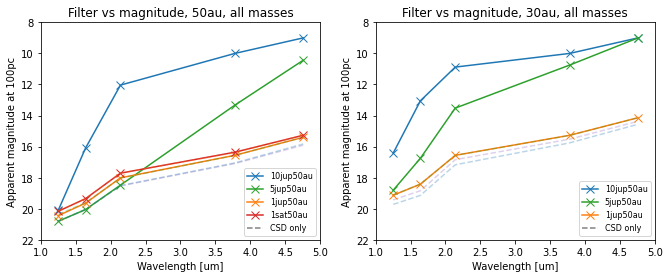

In [18]:
# filter vs mag, diff masses
colors= ['tab:purple','tab:blue','tab:green','tab:orange','tab:red']
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
for i in range(4):
    x, y = [1.25,1.64,2.14,3.78,4.76], data.mag1[5*i:5*i+5]
    plt.plot(x, y, marker='x', markersize=8,label=data['model'][5*i], color=colors[i+1])
    plt.plot(x, data0.mag1[5*i:5*i+5], alpha=0.3, color=colors[i], linestyle='--')
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 50au, all masses')
plt.xlim((1,5))
plt.ylim((22,8))
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
#plt.axhline(y=i, color='gray', linestyle='--')
    
plt.subplot(1,2,2)
for i in range(3):
    x, y = [1.25,1.64,2.14,3.78,4.76], data.mag1[5*i+20:5*i+25]
    plt.plot(x, y, marker='x',markersize=8, label=data['model'][5*i], color=colors[i+1])
    plt.plot(x, data0.mag1[5*i+20:5*i+25], alpha=0.3, color=colors[i], linestyle='--')
handles, labels = plt.gca().get_legend_handles_labels()
line = Line2D([0], [0], label='CSD only', color='gray', linestyle='--')
handles.append(line)
plt.legend(handles=handles,prop={'size': 8})
plt.xlabel('Wavelength [um]')
plt.ylabel('Apparent magnitude at 100pc')
plt.title('Filter vs magnitude, 30au, all masses')
plt.xlim((1,5))
plt.ylim((22,8))

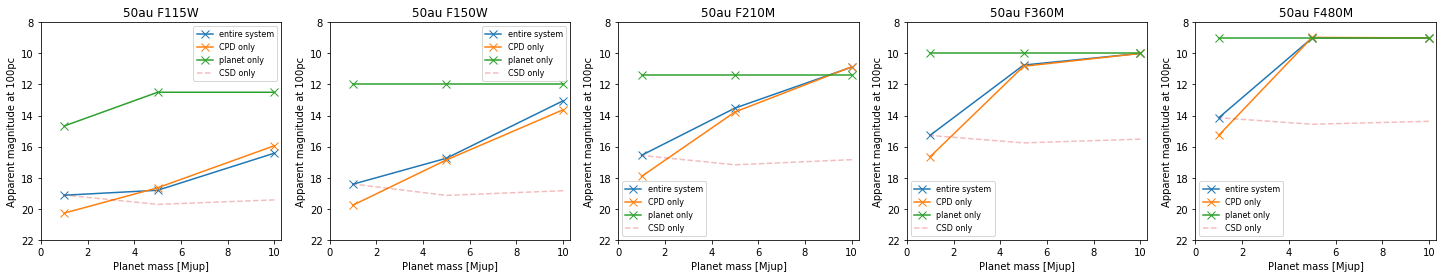

In [57]:
plt.figure(figsize=(25,4))
for j in range(5):
    plt.subplot(1,5,j+1)
    x = [10,5,1]
    plt.plot(x, data.mag1[20+j::5], marker='x',markersize=8, label='entire system')
    plt.plot(x, data1.mag1[20+j::5], marker='x',markersize=8, label='CPD only')
    plt.plot(x, data2.mag1[20+j::5], marker='x',markersize=8, label='planet only')
    plt.plot(x, data0.mag1[20+j::5], alpha=0.3, color=colors[i], linestyle='--', label='CSD only')

    plt.legend(prop={'size': 8})
    plt.xlabel('Planet mass [Mjup]')
    plt.ylabel('Apparent magnitude at 100pc')
    plt.title('30au '+data['filter'][j])
    plt.xlim((0,10.3))
    plt.ylim((22,8))

In [5]:
table=[datasets[0]['model'].values, datasets[0]['filter'].values]
for n in range(len(datasets)):
    col=[]
    for i in range(len(datasets[n])):
        if n > 8:
            a = datasets[n]['mag1'][i]
            col.append(f'{a:.2f}')
        else:
            a = datasets[n]['mag2'][i]
            if datasets[n]['flag'][i] == 'sat':
                col.append(f'<{a:.2f}')
            elif datasets[n]['flag'][i] == 'detect':
                col.append(f'{a:.2f}')
            else:
                col.append(f'{a:.2f}')
    table.append(col)
tabledf = pd.DataFrame.from_records(table).T
tabledf.columns=['model','filter','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$','0$^{\circ}$','30$^{\circ}$','60$^{\circ}$']
#tabledf.to_csv(f'./flux_tables/{instru}_combined.csv')
tabledf

,model,filter,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$,0$^{\circ}$,30$^{\circ}$,60$^{\circ}$
0,10jup50au,F277W,13.20,nan,nan,14.20,nan,nan,<7.70,<7.63,<8.01,11.63,11.63,11.62
1,10jup50au,F380M,9.09,9.95,12.39,9.22,9.81,12.54,5.47,5.44,5.92,10.20,10.20,10.18
2,10jup50au,F430M,8.96,10.08,nan,9.26,9.33,nan,5.24,5.21,5.68,10.49,10.48,10.46
3,10jup50au,F480M,8.28,9.29,15.47,8.58,8.87,14.80,5.11,5.05,5.54,10.32,10.31,10.30
4,5jup50au,F277W,nan,nan,nan,nan,nan,nan,10.16,10.19,10.23,11.63,11.62,11.62
5,5jup50au,F380M,12.64,12.81,12.94,12.48,12.68,12.85,7.83,7.94,7.93,10.20,10.20,10.18
6,5jup50au,F430M,nan,nan,nan,nan,nan,nan,7.44,7.54,7.53,10.49,10.48,10.46
7,5jup50au,F480M,13.20,nan,nan,13.45,nan,nan,7.17,7.25,7.26,10.32,10.31,10.30
8,1jup50au,F277W,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.63,11.63,11.61
9,1jup50au,F380M,12.86,12.89,12.95,12.85,12.84,12.88,9.77,9.77,10.04,10.20,10.19,10.17
